In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('/home/administrator/Documents/ML Programming/Datasets/houseprice.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [18]:
data.shape

(4600, 18)

In [19]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [20]:
column_datatypes = data.dtypes

print("Datatypes of all columns:")
print(column_datatypes)

Datatypes of all columns:
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [21]:
outliers = np.where(data['price']==0)[0] #storing the index numbers of those rows with price mentioned as 0 since they are our outliers
outliers

array([4354, 4356, 4357, 4358, 4361, 4362, 4374, 4376, 4382, 4383, 4385,
       4386, 4389, 4394, 4405, 4408, 4411, 4412, 4413, 4420, 4442, 4448,
       4453, 4454, 4472, 4478, 4479, 4480, 4481, 4487, 4499, 4507, 4509,
       4520, 4521, 4522, 4523, 4528, 4534, 4542, 4552, 4554, 4555, 4558,
       4563, 4567, 4574, 4575, 4588])

In [22]:
data.drop(index=outliers, inplace=True) #dropping outliers

In [23]:
data.shape

(4551, 18)

In [38]:
rdata=data.drop(columns=['date', 'street', 'statezip', 'country', 'city'], axis=1) #dropping the columns which are insignificant in while buulding the ML model

In [39]:
rdata.head() #printing the first 5 values of the revised data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_bin
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Moderate
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Expensive
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Moderate
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Moderate
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Moderate


In [40]:
bin_edges = [6000, 50000, 100000, 1000000, 10000000 , 30000000] 
bin_labels = ['Very Affordable', 'Affordable', 'Moderate', 'Expensive', 'Luxurious']
rdata['price_bin'] = pd.cut(rdata['price'], bins=bin_edges, labels=bin_labels, right=False)

In [41]:
rdata.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_bin
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Moderate
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Expensive
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Moderate
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Moderate
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Moderate


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
X = rdata.drop(columns = ['price', 'price_bin'], axis=1)
y = rdata['price_bin']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
# Create a k-NN classifier with a specified number of neighbors (e.g., 5)
k = 38
knn = KNeighborsClassifier(n_neighbors=k)

In [91]:
# Train the k-NN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, classification_report
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# View a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 93.74%
              precision    recall  f1-score   support

  Affordable       0.00      0.00      0.00         1
   Expensive       0.73      0.28      0.40        68
    Moderate       0.94      0.99      0.97       842

    accuracy                           0.94       911
   macro avg       0.56      0.42      0.46       911
weighted avg       0.93      0.94      0.92       911



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


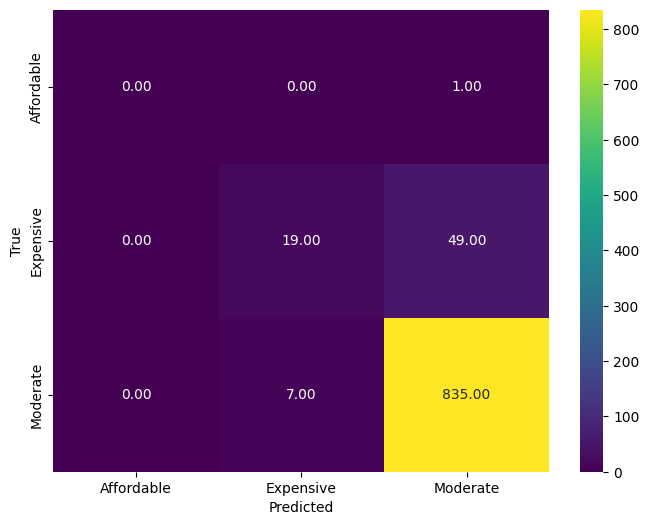

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=['Affordable', 'Expensive', 'Moderate'], yticklabels=['Affordable', 'Expensive', 'Moderate'] )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
